# Prying into linux commits

People willing to learn often ask me where can they find some good data to work with. My reply usually tends to be "don't look too far". Because the most interesting of data-sets have a habit of hiding in plain sight, waiting for someone to skew their perspective and figure it out.

Take linux for example. It is such an indispensible part of our lives. We use it everyday in one was or another. It has such a fabled history and is actively under development till this day. It is one of the largest and most important open source project and it's [github repo](https://github.com/torvalds/linux) the highest number of commits I have ever seen (besides [this nonsense](https://github.com/cirosantilli/test-many-commits-1m) ofcourse). Way to hide in plain sight!


![image.png](https://i.ibb.co/Y7Yvtxd/linux.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 ## Prepping the commit data
 
People tend to dread data preparation and pre-processing but this part of the process generally ends up being the difference maker. Our case is pretty straight-forward. We clone the linux git repository, read a formatted git log with their commits, authors and timestamps, and save the logs into a text file.

```bash
git clone https://github.com/torvalds/linux
git log --pretty=format:"%h|%ad|%an|%f" > linux_git_log.csv
```
Then we load the logs into a pandas dataframe.

In [2]:
df = pd.read_csv("linux_git_log.csv", delimiter="|", header=None, engine='python')
df.columns = ["commit", "timestamp", "user", "message"]
df["timestamp"] = pd.to_datetime(df["timestamp"], infer_datetime_format=True)
df = df.set_index("timestamp", drop=True)
df.head()

,commit,user,message
timestamp,,,
2019-01-10 12:28:39,70c25259537c,Guo Ren,csky-fixup-compile-error-with-CPU-810
2019-01-10 00:51:17,ba422731316d,Sean Christopherson,mm-mmu_notifier-mm-rmap.c-Fix-a-mmu_notifier-r...
2019-01-09 18:00:11,4064e47c8281,Linus Torvalds,Merge-tag-csky-for-linus-5.0-rc1-of-git-github...
2019-01-09 02:58:29,a88cc8da0279,Linus Torvalds,Merge-branch-akpm-patches-from-Andrew
2019-01-08 13:15:15,9cb2feb4d21d,Stafford Horne,arch-openrisc-Fix-issues-with-access_ok


## Exploration

First things first. We have to check the amount of commits going into the project over time.

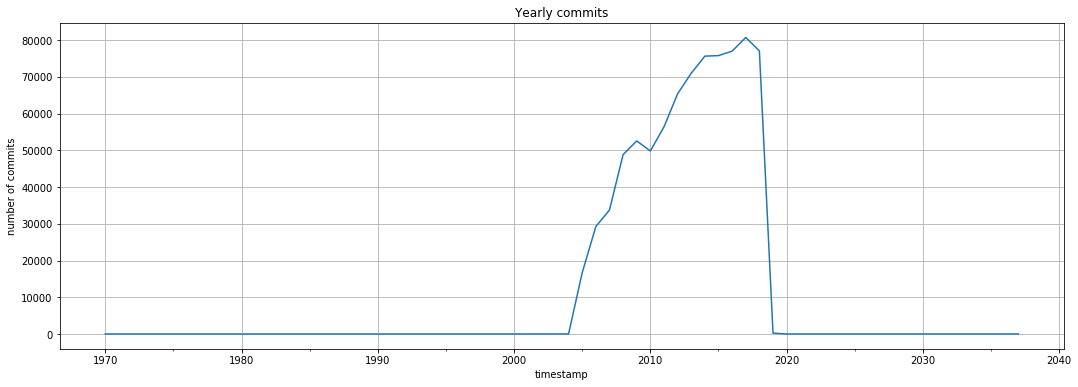

In [3]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.xlabel("years")
plt.ylabel("number of commits")
plt.title("Yearly commits")
df["commit"].resample("Y").count().plot(grid=True)

This, to be honest, is quite puzzling. There are commits starting from 1970s and going all the way beyond 2030s.

The values before early 2000s and after late 2010s seem to be not contributing much. They are too small for the naked eyes to understand. Need to get a better view into it. If we take a [log on y-axis](https://www.youtube.com/watch?v=sBhEi4L91Sg) (apply log function on the number of commits), it would be easier to figure out whats happening there.

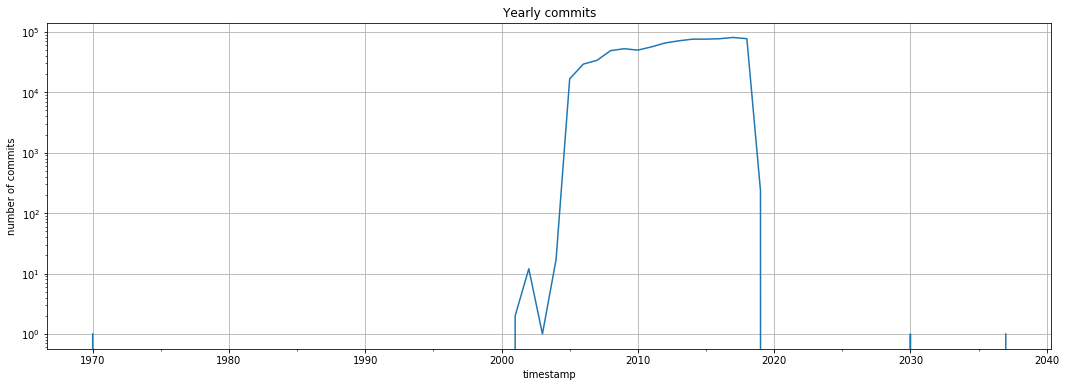

In [4]:
plt.xlabel("years")
plt.ylabel("number of commits")
plt.title("Yearly commits")
df["commit"].resample("Y").count().plot(logy=True, grid=True)

OK much clearer now. As we can see, there are some awkward commits in the years 1970 and 2030 and around late 2030s.

## A little bit of history.

In 1991, while attending the University of Helsinki, Torvalds, frustrated by the licensing of MINIX, which at the time limited it to educational use only, began to work on his own operating system kernel, which eventually became the Linux kernel. Linux's initial release took place on 17th September, 1991.

Git, on the other hand, was developed by Torvalds as well and was initially released in 7th April, 2005. Nine days later, he created the repo for linux. The [first ever commit to this repo](https://github.com/torvalds/linux/commit/1da177e4c3f4) read something like this.
```
 Linux-2.6.12-rc2

Initial git repository build. I'm not bothering with the full history,
even though we have it. We can create a separate "historical" git
archive of that later if we want to, and in the meantime it's about
3.2GB when imported into git - space that would just make the early
git days unnecessarily complicated, when we don't have a lot of good
infrastructure for it.

Let it rip!
```

In [5]:
df.tail(1)

,commit,user,message
timestamp,,,
2005-04-16 22:20:36,1da177e4c3f4,Linus Torvalds,Linux-2.6.12-rc2


Wish all of linux development was tracked on github. Imagine how many commits that would've made! But thats beyond the point. The point being the weird commits on 1970s and 2030s are mere anomalies. Anomalies we must take a closer look into.

In [6]:
first_commit = "2005-04-16 22:20:36"
df[df.index<first_commit].sort_values(by='timestamp').head()

,commit,user,message
timestamp,,,
1970-01-01 00:00:01,224426f168aa,Ursula Braun,qeth-remove-header_ops-bug
2001-09-17 07:00:00,aebda6187181,John Youn,usb-dwc3-Reset-the-transfer-resource-index-on-...
2001-09-17 07:00:00,dbe79bbe9dcb,John Youn,USB-3.0-Hub-Changes
2002-04-09 19:14:34,ceeee1fb2897,Greg Kroah-Hartman,SYSFS-allow-sysfs_create_link-to-create-symlin...
2002-04-09 19:14:34,0f64478cbc7a,Greg Kroah-Hartman,USB-add-USB-serial-mos7720-driver


There are about 499 commits pre-dating Torvald's initial commit. The only reasonable explanation here is that Ursula Braun used Doc's DeLorean to *remove header_ops bug*.

In [7]:
from datetime import datetime
df[df.index>datetime.now()]

,commit,user,message
timestamp,,,
2037-04-25 08:08:26,12ca45fea91c,Daniel Vetter,drm-i915-overlay-extract-some-duplicated-code
2030-08-14 07:56:40,09f2724a786f,"Zhang, Yanmin",sched-fix-the-race-between-walk_tg_tree-and-sc...
2019-04-05 05:07:45,a27ac38efd6d,Len Brown,ACPI-fix-merge-error-that-broke-CONFIG_ACPI_DE...


There are 3 commits from the future as well. I assume they are messages from John Conner and the remaining resistance.
(Jokes aside, we can manually set timestamp of a commit to anything. This is most probably whats happening here.)

We do not want to concern ourselves with these out of time commits. Given these commits are so few in numbers, we take into consideration only this starting from Torvald's initial commit to the last one of 2018.

In [8]:
df = df[(df.index>=first_commit) & (df.index<"2019-01-01")]
df.head()

,commit,user,message
timestamp,,,
2018-12-31 08:24:09,ad774086356d,Masahiro Yamada,kbuild-change-filechk-to-surround-the-given-co...
2018-12-31 08:24:08,172caf1993b7,Masahiro Yamada,kbuild-remove-redundant-target-cleaning-on-fai...
2018-12-31 04:09:00,f5688663db9b,Masahiro Yamada,kbuild-clean-up-rule_dtc_dt_yaml
2018-12-31 01:05:01,786ac51a4846,Masahiro Yamada,kbuild-remove-UIMAGE_IN-and-UIMAGE_OUT
2018-12-30 15:14:15,e9666d10a567,Masahiro Yamada,jump_label-move-asm-goto-support-test-to-Kconfig


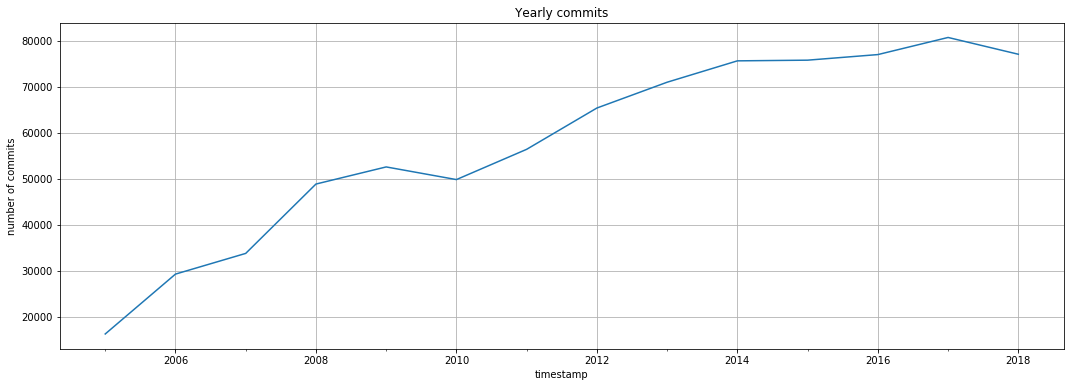

In [9]:
plt.xlabel("years")
plt.ylabel("number of commits")
plt.title("Yearly commits")
df["commit"].resample("Y").count().plot(grid=True)

Things finally look clean. There seems to be a great amount of activity in the repo. The contribution rapidly grew in the 13 years of group and there seems to be a consistent 75000+ commits every year since 2014. Some other interesting statistics are below.

In [10]:
print("Statistics:")
print("-----------")
print("Total no of commits:", len(df))
print("Total no of contributors:", len(df["user"].unique()))
print("Average commit per user:", len(df)/len(df["user"].unique()))
last_year_df = df[df.index>"2017-01-01"]
print("Total %age of commits last year:", len(last_year_df)/len(df)*100)
print("Total %age of active contributors last year:", len(last_year_df["user"].unique())/len(df["user"].unique())*100)
print("Average commit per user last year:", len(last_year_df)/len(last_year_df["user"].unique()))


Statistics:
-----------
Total no of commits: 809563
Total no of contributors: 19679
Average commit per user: 41.13842166776767
Total %age of commits last year: 19.495085620266735
Total %age of active contributors last year: 32.84211596117689
Average commit per user last year: 24.419774098715767


<BarContainer object of 24 artists>

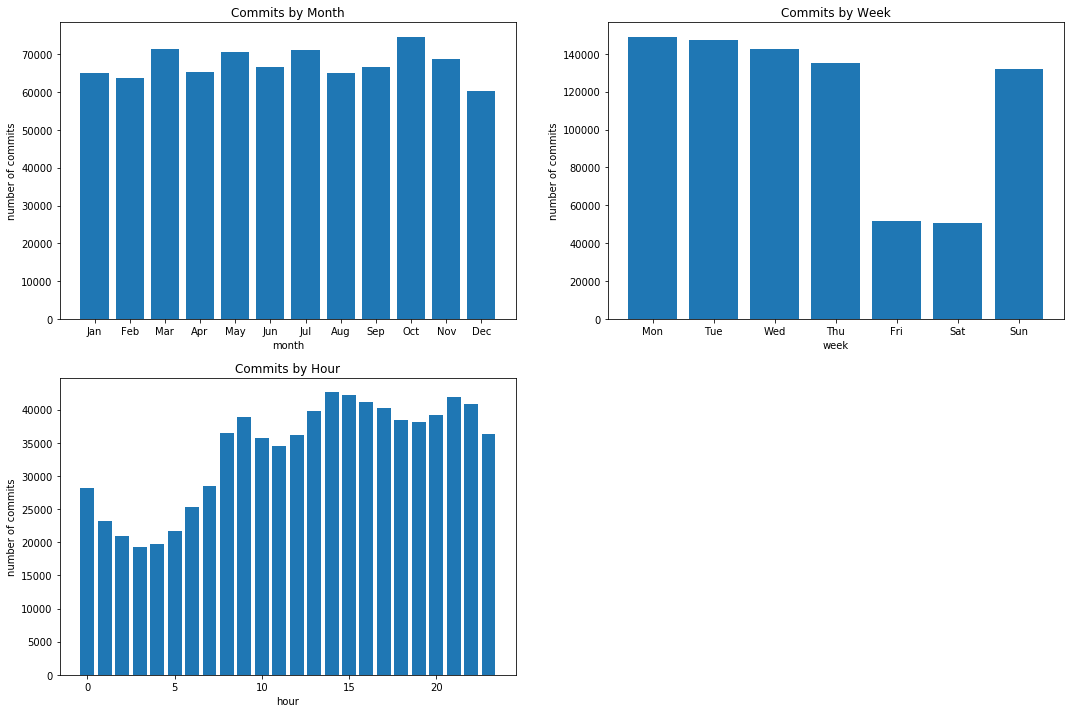

In [11]:
import calendar

month_dict = {calendar.month_name[k+1]: 0 for k in range(12)}
week_dict = {calendar.day_name[k]: 0 for k in range(7)}
hour_dict = {k: 0 for k in range(24)}

for ts in df.index:
    month_dict[calendar.month_name[ts.month]] += 1
    week_dict[calendar.day_name[ts.weekday()-1]] += 1
    hour_dict[ts.hour] += 1

plt.rcParams['figure.figsize'] = (18, 12)
plt.figure(1)

plt.subplot(2, 2, 1)
plt.xlabel("month")
plt.ylabel("number of commits")
plt.title("Commits by Month")
plt.bar([mnth[:3] for mnth in month_dict.keys()], month_dict.values())

plt.subplot(2, 2, 2)
plt.xlabel("week")
plt.ylabel("number of commits")
plt.title("Commits by Week")
plt.bar([week[:3] for week in week_dict.keys()], week_dict.values())

plt.subplot(2, 2, 3)
plt.xlabel("hour")
plt.ylabel("number of commits")
plt.title("Commits by Hour")
plt.bar(hour_dict.keys(), hour_dict.values())

We can figure some interesting habit out of above bar charts. The commits seems to have a slight drop around december most probably due to holiday seasons. Linux contributors seem to contribute significantly less on Fridays and Sundays proving they do have a life.

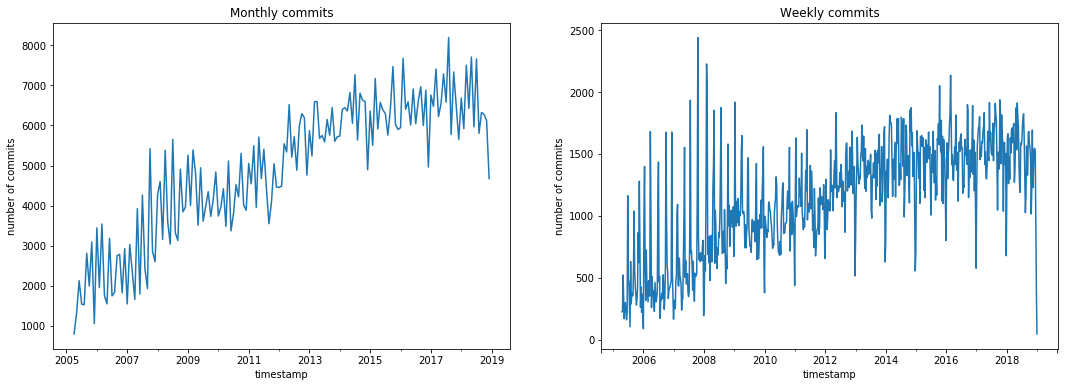

In [12]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.figure(1)

plt.subplot(1, 2, 1)
monthly_count = df["commit"].resample("M").count()
plt.xlabel("time")
plt.ylabel("number of commits")
plt.title("Monthly commits")
monthly_count.plot()

plt.subplot(1, 2, 2)
weekly_count = df["commit"].resample("W").count()
plt.xlabel("time")
plt.ylabel("number of commits")
plt.title("Weekly commits")
weekly_count.plot()

If we take a look into the monthly or weekly commits it seems as if they are fluctuating around a trend.

## Time Series Analysis

A time series is a series of data points indexed in time order. Time series analysis is a statistical technique that deals with time series data, or trend analysis. Time series forecasting is the use of a model to predict future values based on previously observed values. Time series are widely used for non-stationary data, like economic, weather, stock price, retail sales, and in our case, git commits!

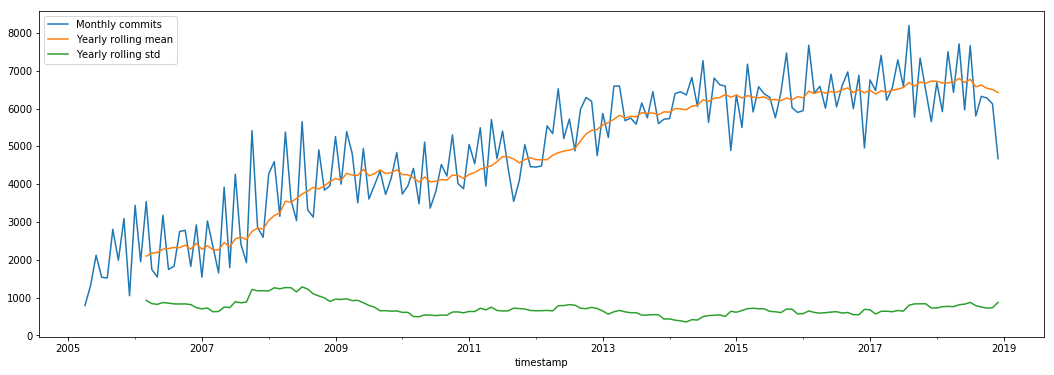

In [13]:
monthly_count.plot(label="Monthly commits")
monthly_count.rolling(12).mean().plot(label="Yearly rolling mean")
monthly_count.rolling(12).std().plot(label="Yearly rolling std")
plt.legend()

The monthly commits fluctuate. It spikes high and low. However, if we average it a previous year, we could see that they follow a **trend**. The trend generally seems to be moving up. The highs and lows may very well be in a pattern i.e. it can be **seasonal**. And there are obvious randomness in these commits we cannot account for. They are called **noise**.


### Additive Decomposition

A time series can be decomposed into three distinct components and visualized as
- trend
- seasonality
- noise/residual

An additive deconposition does just that.

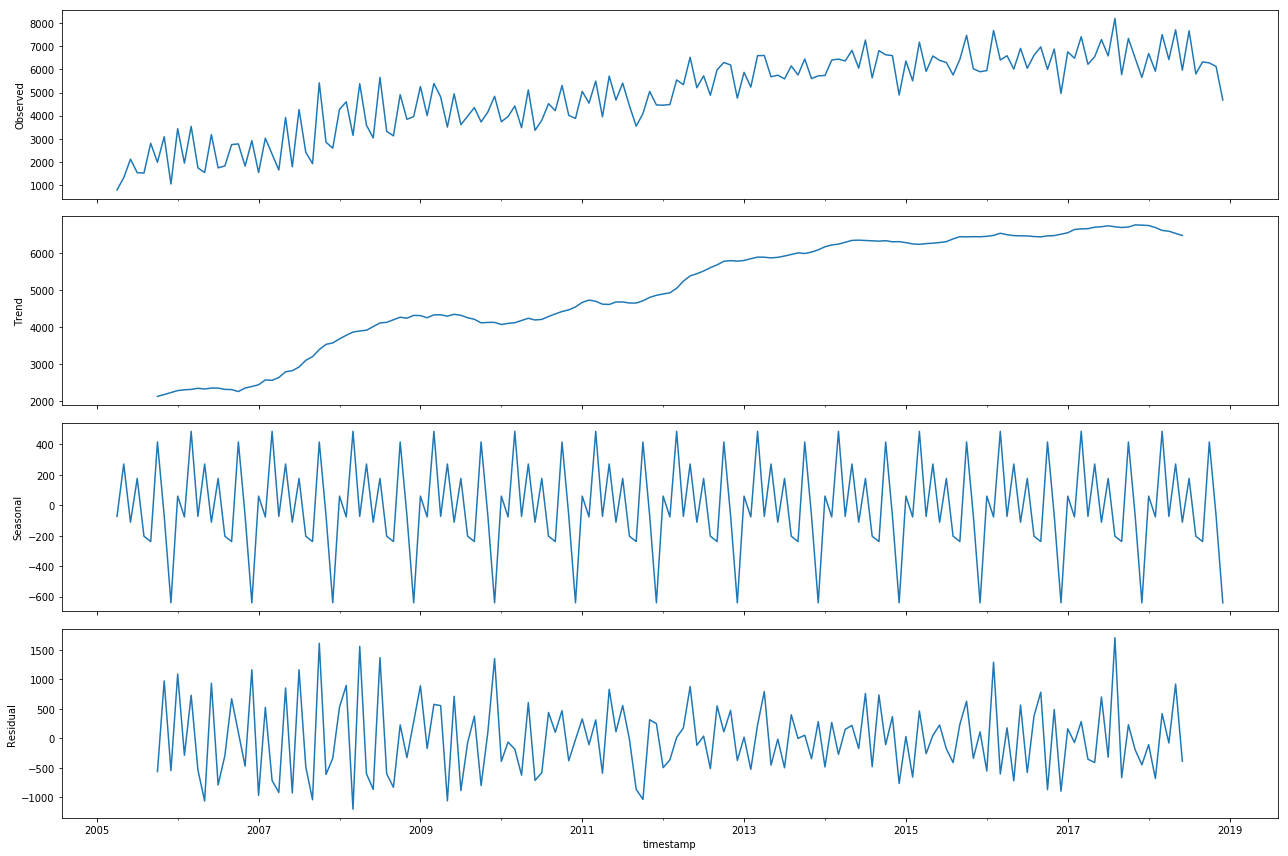

In [14]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (18, 12)
decomposition = sm.tsa.seasonal_decompose(monthly_count, model="additive")
fig = decomposition.plot()

Activities in the repository seems to be continuously rising. There is a sharp uptick from 2007-2008 and a gradual increase ever since. There seems to be an interesting seasonal pattern as well.

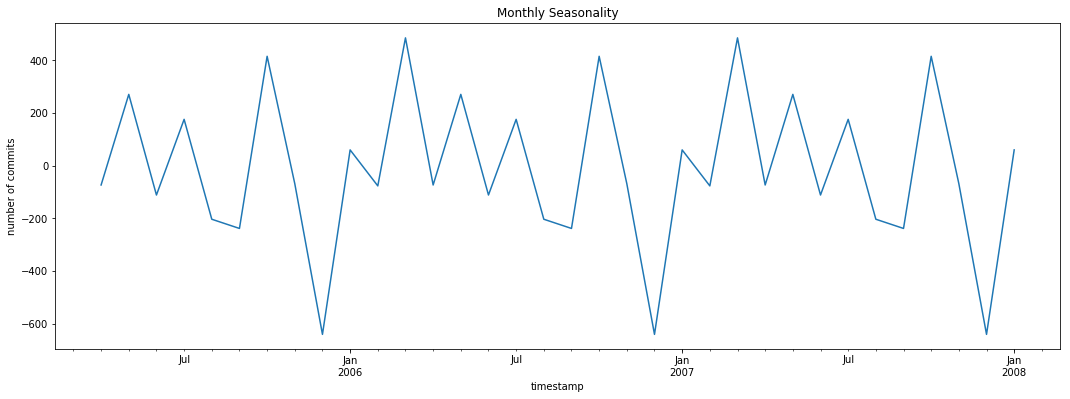

In [15]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.xlabel("time")
plt.ylabel("number of commits")
plt.title("Monthly Seasonality")
decomposition.seasonal[:"2008-02-01"].plot()

When looking closely upon seasonal pattern, we could see a sharp drop during the end of december. This corroborates with our previous assumption that this drop is most probably due ot holiday season. There are similar patterns in weekly time-series as well.

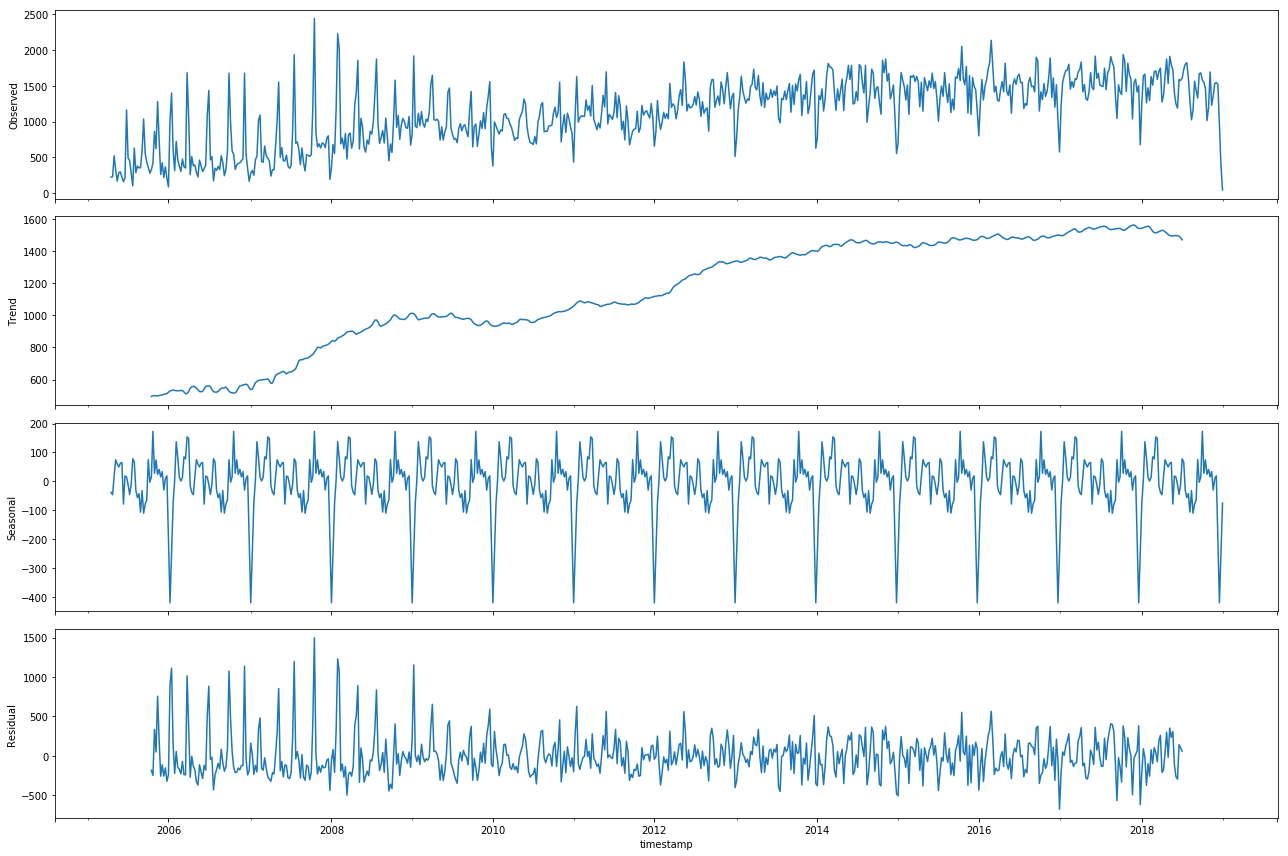

In [16]:
plt.rcParams['figure.figsize'] = (18, 12)
decomposition = sm.tsa.seasonal_decompose(weekly_count, model="additive")
fig = decomposition.plot()

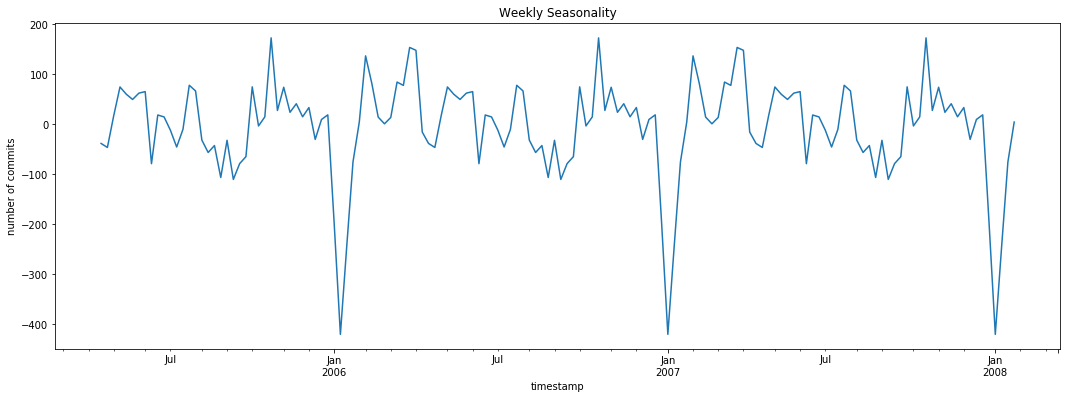

In [17]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.xlabel("time")
plt.ylabel("number of commits")
plt.title("Weekly Seasonality")
decomposition.seasonal[:"2008-02-01"].plot()

## Prying into Linus Torvald's commits

![linus](https://cdn.solacore.net/upload/2017-12-24/67b4838e-d76a-4f65-ba45-efa7f51078b3.jpg)

OK. Lets get to the meat of it. The man who started it all. As we discussed earlier, git started way later than linux so a majority of early work were never tracked. Would've been very interesting if it had been so. Regardless, Torvald still handles majority of the contributions. That too, by a singnificant margin.

,commit
user,
Linus Torvalds,26429
David S. Miller,11050
Mark Brown,7242
Takashi Iwai,6689
Al Viro,6431


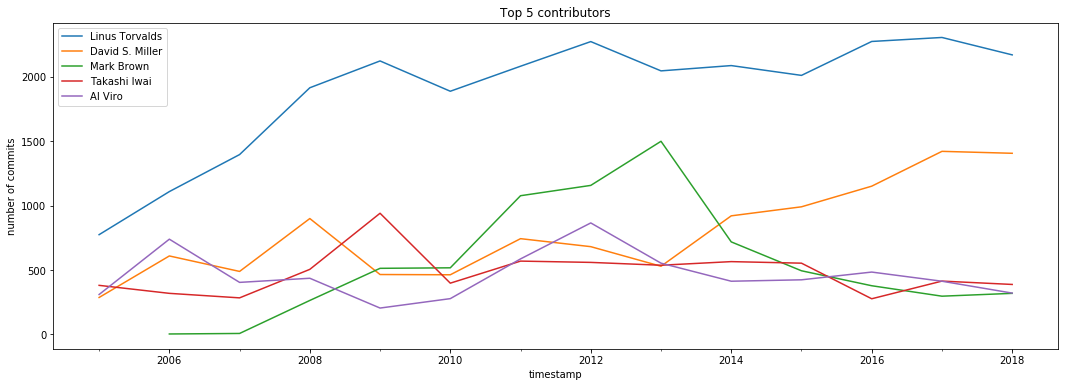

In [18]:
user_commit_df = df[["user", "commit"]].groupby("user").count().sort_values(by=['commit'], ascending=False)

plt.xlabel("time")
plt.ylabel("number of commits")
plt.title("Top 5 contributors")
for user in user_commit_df.index[:5]:
    linus_df = df[df["user"]==user]
    linus_df["commit"].resample("Y").count().plot(legend=True, label=user)

user_commit_df.head()

,commit,user,message
timestamp,,,
2016-05-22 04:55:19,a959dc88f9c8,Linus Torvalds,Use-__put_user_goto-in-__put_user_size-and-uns...
2016-05-22 04:44:51,4a789213c9a5,Linus Torvalds,x86-uaccess-Introduce-__put_user_goto
2018-12-31 19:46:59,495d714ad140,Linus Torvalds,Merge-tag-trace-v4.21-of-git-git.kernel.org-pu...
2018-12-31 17:57:14,f12e840c819b,Linus Torvalds,Merge-branch-for-linus-of-git-git.kernel.org-p...
2018-12-31 17:54:17,e3ed513bcf00,Linus Torvalds,Merge-branch-sched-urgent-for-linus-of-git-git...


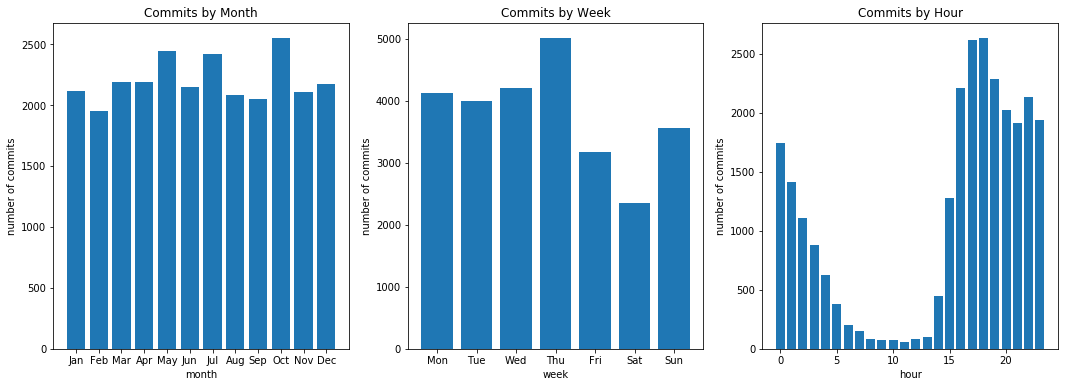

In [19]:
linus_df = df[df["user"]=="Linus Torvalds"]

month_dict = {calendar.month_name[k+1]: 0 for k in range(12)}
week_dict = {calendar.day_name[k]: 0 for k in range(7)}
hour_dict = {k: 0 for k in range(24)}

for ts in linus_df.index:
    month_dict[calendar.month_name[ts.month]] += 1
    week_dict[calendar.day_name[ts.weekday()-1]] += 1
    hour_dict[ts.hour] += 1

plt.rcParams['figure.figsize'] = (18, 6)
plt.figure(1)

plt.subplot(1, 3, 1)
plt.xlabel("month")
plt.ylabel("number of commits")
plt.title("Commits by Month")
plt.bar([mnth[:3] for mnth in month_dict.keys()], month_dict.values())

plt.subplot(1, 3, 2)
plt.xlabel("week")
plt.ylabel("number of commits")
plt.title("Commits by Week")
plt.bar([week[:3] for week in week_dict.keys()], week_dict.values())

plt.subplot(1, 3, 3)
plt.xlabel("hour")
plt.ylabel("number of commits")
plt.title("Commits by Hour")
plt.bar(hour_dict.keys(), hour_dict.values())

linus_df.head()

He has made 26429 contributions till 2018 and commits more on weekends than an average contributor. His commits by hour also shows when he is most active throughout the day. Do what you will with that information.

But more interestingly, he maintains more than he develops. A lot of his contributions are merges and releases.

,total_commits,merges,sources
total_commits,1.000000,0.997880,-0.420693
merges,0.997880,1.000000,-0.478849
sources,-0.420693,-0.478849,1.000000


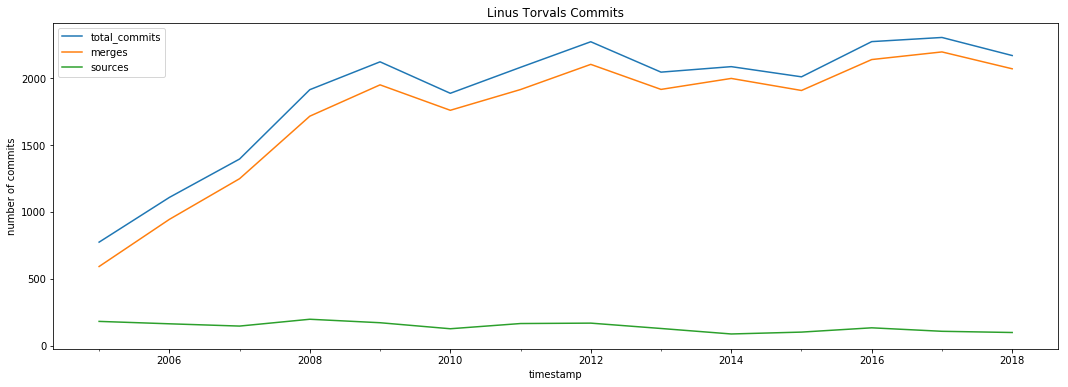

In [20]:
merge_linus_df = linus_df[linus_df['message'].str.startswith("Merge")]
source_linus_df = linus_df[~linus_df['message'].str.startswith("Merge")]

linus_commit_count_df = pd.DataFrame(dict(
    total_commits=linus_df["commit"].resample("Y").count(),
    merges=merge_linus_df["commit"].resample("Y").count(),
    sources=source_linus_df["commit"].resample("Y").count(),
)).reset_index()
linus_commit_count_df = linus_commit_count_df.set_index("timestamp", drop=True)

plt.rcParams['figure.figsize'] = (18, 6)
linus_commit_count_df.plot()
plt.ylabel("number of commits")
plt.title("Linus Torvals Commits")
linus_commit_count_df.corr()

,total_commits,total_merges,total_sources,linus_merges
total_commits,1.000000,0.984267,0.999826,0.925138
total_merges,0.984267,1.000000,0.980802,0.880559
total_sources,0.999826,0.980802,1.000000,0.928145
linus_merges,0.925138,0.880559,0.928145,1.000000


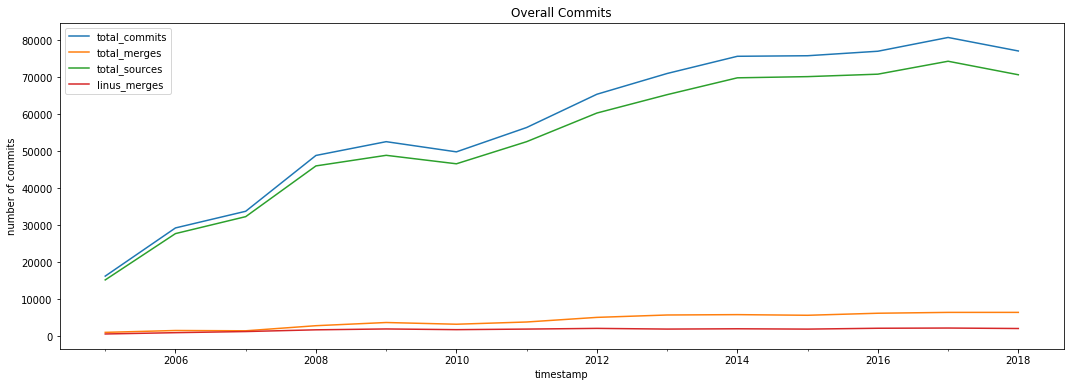

In [21]:
merge_df = df[df['message'].fillna("").str.startswith("Merge")]
sources_df = df[~df['message'].fillna("").str.startswith("Merge")]

commit_count_df = pd.DataFrame(dict(
    total_commits=df["commit"].resample("Y").count(),
    total_merges=merge_df["commit"].resample("Y").count(),
    total_sources=sources_df["commit"].resample("Y").count(),
    linus_merges=linus_commit_count_df["merges"]
)).reset_index()
commit_count_df = commit_count_df.set_index("timestamp", drop=True)

plt.rcParams['figure.figsize'] = (18, 6)
commit_count_df.plot()
plt.ylabel("number of commits")
plt.title("Overall Commits")
commit_count_df.corr()

His contributions as a maintainer dwarfs his contributions as a developer. Even so, he is a respectable 45th highest contributor in terms of source code.

Linus Torvald source rank: 45


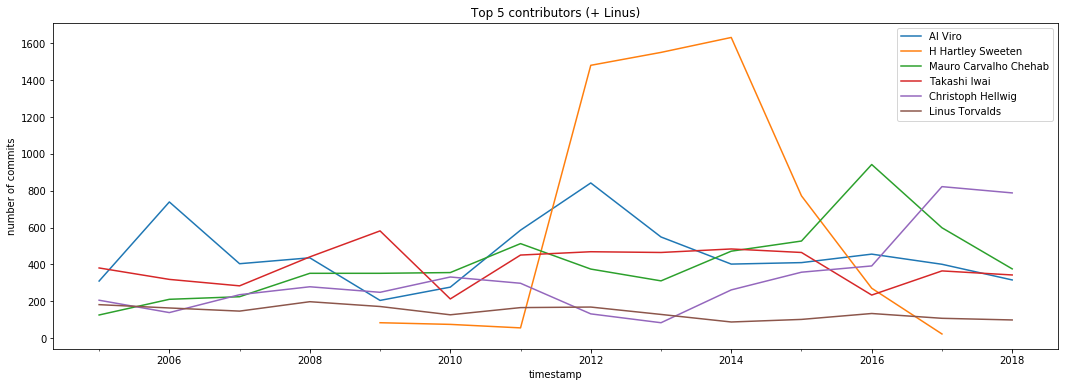

In [22]:
merge_commit_count_df = sources_df[["user", "commit"]].groupby("user").count().sort_values(by=['commit'], ascending=False)
print("Linus Torvald source rank:", list(merge_commit_count_df.index).index("Linus Torvalds"))

plt.xlabel("time")
plt.ylabel("number of commits")
plt.title("Top 5 contributors (+ Linus)")
for user in list(merge_commit_count_df.index[:5]) + ["Linus Torvalds"]:
    user_df = sources_df[sources_df["user"]==user]
    user_df["commit"].resample("Y").count().plot(legend=True, label=user)

His overall contributions are consistent. We can't see any sharp rises or falls in his seasonal decompositions meaning he works consistently in almost all seasons.

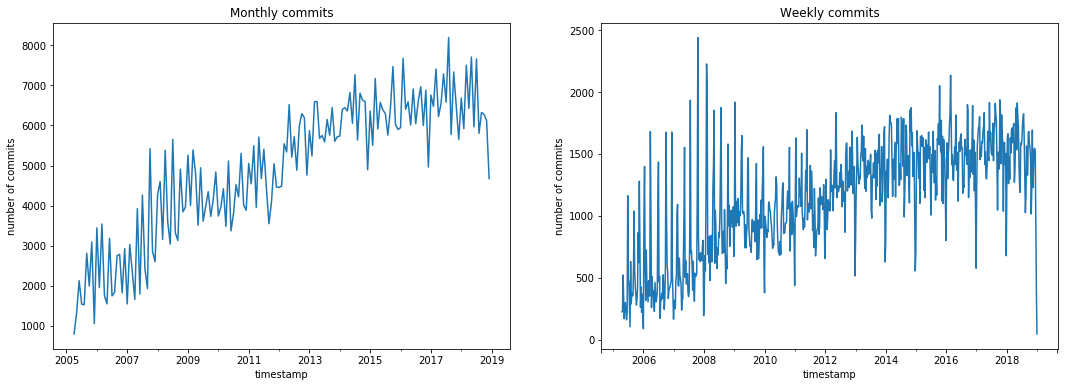

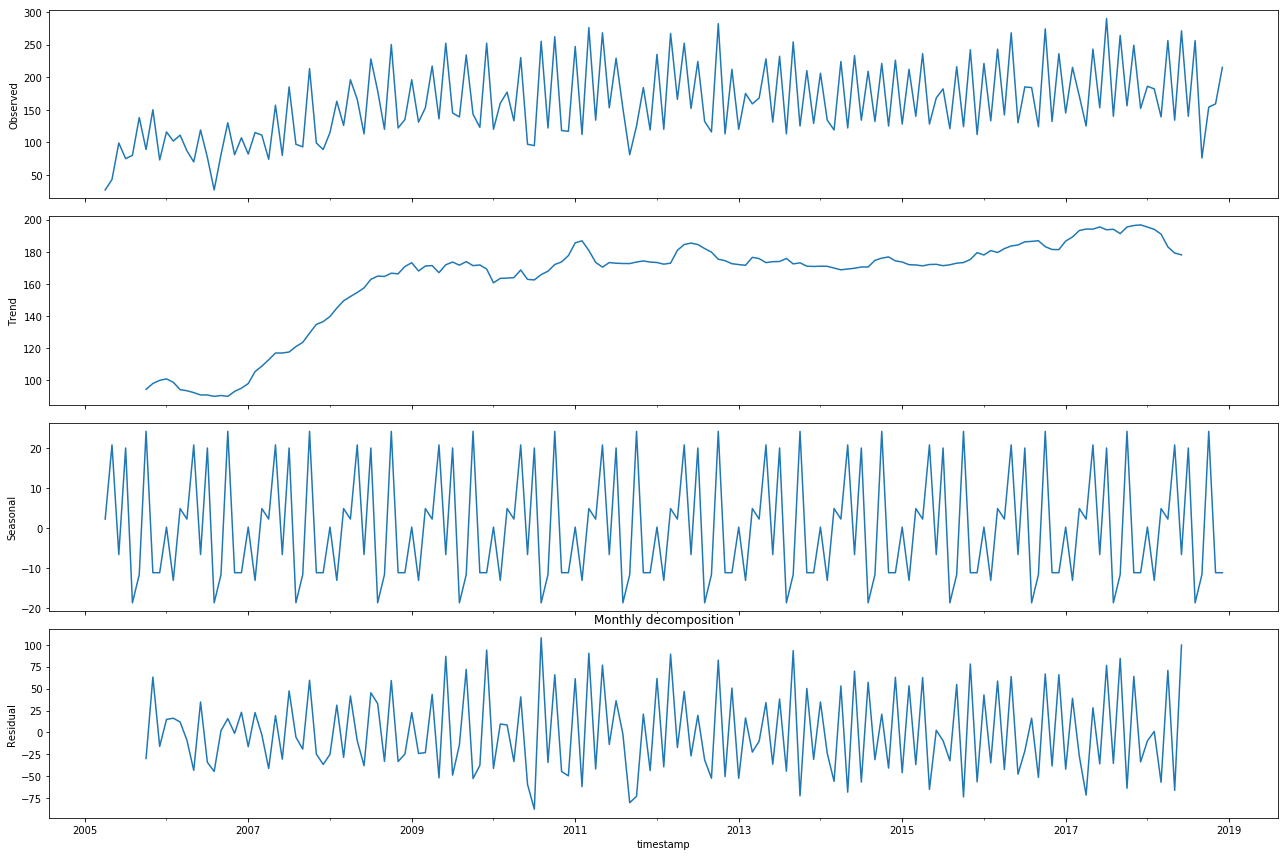

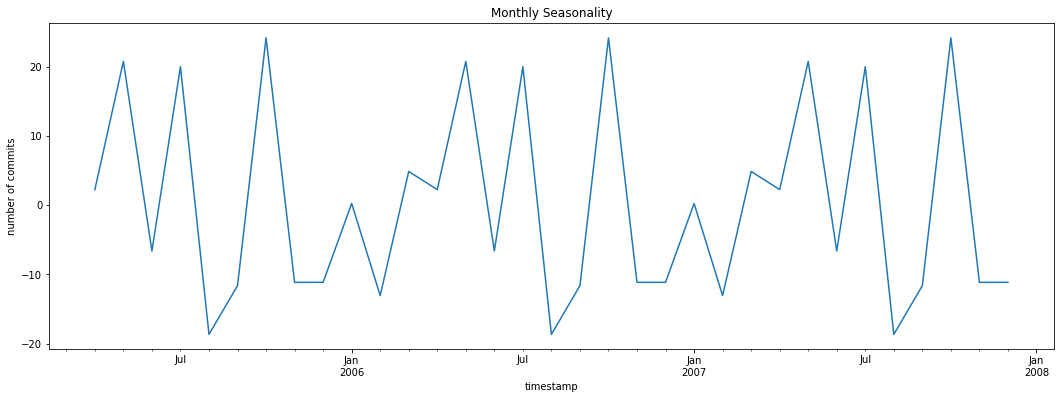

In [23]:
plt.figure(1)

plt.subplot(1, 2, 1)
linus_commit_monthly_count = linus_df["commit"].resample("M").count()
plt.xlabel("time")
plt.ylabel("number of commits")
plt.title("Monthly commits")
monthly_count.plot()

plt.subplot(1, 2, 2)
linus_commit_weekly_count = linus_df["commit"].resample("W").count()
plt.xlabel("time")
plt.ylabel("number of commits")
plt.title("Weekly commits")
weekly_count.plot()

plt.rcParams['figure.figsize'] = (18, 12)
decomposition = sm.tsa.seasonal_decompose(linus_commit_monthly_count, model="additive")
fig = decomposition.plot()
plt.title("Monthly decomposition")

plt.show()

plt.rcParams['figure.figsize'] = (18, 6)
plt.xlabel("time")
plt.ylabel("number of commits")
plt.title("Monthly Seasonality")
decomposition.seasonal[:"2008-01-01"].plot()

Understandable, as time passed, he contributed more by handling pull requests rather than writing new stuffs. If we check his commits, as the trend for his merges increased, the same for his source contribution decreased.

Merge souce correlation: -0.5238693415716301


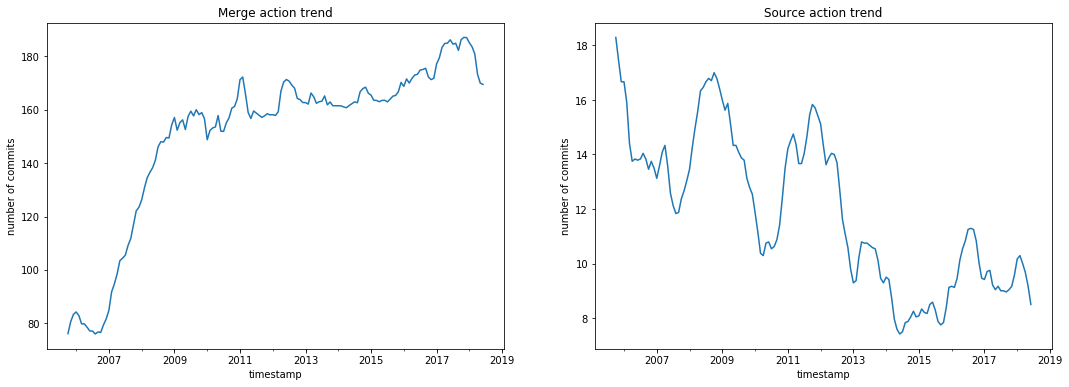

In [24]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.figure(1)

plt.subplot(1, 2, 1)
decomposition = sm.tsa.seasonal_decompose(merge_linus_df["commit"].resample('M').count(), model="additive")
plt.ylabel("number of commits")
plt.title("Merge action trend")
merge_trend = decomposition.trend
merge_trend.plot()

plt.subplot(1, 2, 2)
decomposition = sm.tsa.seasonal_decompose(source_linus_df["commit"].resample('M').count(), model="additive")
plt.ylabel("number of commits")
plt.title("Source action trend")
source_trend = decomposition.trend
source_trend.plot()

print("Merge souce correlation:", np.corrcoef(merge_trend.dropna(), source_trend.dropna())[0][1])

## Next in line

There are different algorithms that can be used for a **time series forcasting**. It means by analyzing the patterns of current commits we can predict commits in the coming years(still thinking why someone would want to predict commits though). [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) is a popular model for time series forcasting and by the looks of it it pretty good. Still loads to figure out.

![image.png](https://i.ibb.co/0ZHRSKz/arima.png)